## Practice 2: Pulse configuration

In [1]:
'''Import libraries'''
from qmio import QmioRuntimeService
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

service = QmioRuntimeService()

In [2]:
'''
Function to run instructions on QPU.
If the job yields an error, the message is printed.
'''

def run_instruction(_backend, _instruction, _shots):
    _res = _backend.run(circuit = _instruction, shots = _shots, res_format = 'raw')
    try :
        return _res["results"].reshape((_shots,))
    except :
        print(_res)

Use the following fuctions to apply a custom pulse:

 - On a ```cal``` block:

     - ```extern frame qN_drive```
     - ```constant(time, amplitude)```
 
 - On a ```defcal``` block:
 
     - ```play(frame, waveform)```

In [3]:
instruction = '''
OPENQASM 3;
defcalgrammar "openpulse";
    
cal {
    extern frame q8_drive;
    waveform wf = constant(900dt, 0.15);
}

defcal custom_pulse $8{
    play(q8_drive, wf);
}

custom_pulse $8;
measure $8;
'''

In [4]:
shots = 1000       
with service.backend(name = "qpu") as backend:                                                                      
        res = run_instruction(backend, instruction, shots)   

Waiting for resources


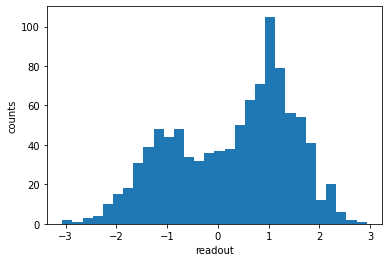

In [5]:
plt.hist(res, bins = 30)
plt.xlabel('readout')
plt.ylabel('counts')
plt.show()